# Sistema de Predicción de Arqueotipos de Mazo de Hearthstone

**Autores:** Jorge Fatama Vera y Sergio Cama Chávez.<br>
**Universidad:** Pontificia Universidad Católica del Perú, Lima, Perú.<br>
**Curso:** *Curso de Capacitación en Deep Learning 2018-01*.<br>

<img src="Images/hs-logo.png">

## Sustentación del Proyecto

En Kaggle se encontró un dataset llamado "*History of Hearthstone*", perteneciente al usuario *romainvincent*, el cual contiene, hasta su última actualización, alrededor de 3 mil cartas (en el archivo *refs.json*) y 300 mil mazos subidos a la conocida página *Hearthpwn* (en el archivo *data.csv*). Usted puede acceder al *dataset* de *romainvincent* haciendo clic <a href="https://www.kaggle.com/romainvincent/history-of-hearthstone">AQUÍ</a>.<br>

El objetivo del proyecto es resolver uno de los cuatro problemas planteados por *romainvincent* en la descripción de su dataset: predecir el arqueotipo de un mazo basado en las características de las cartas contenidas en éste. Para lograr este objetivo, se ha utilizado, como método de Aprendizaje de Máquina, el conocido *RandomForestClassifier*.<br>

Como parte de un producto final, se implementó un servicio web que, habiendo recibido las treinta (30) cartas de un mazo, predice cuál es el arqueotipo al que más se ajusta. Esta parte del proyecto toma como ejemplo la mecánica de *HearthArena.com*, el cual es un servicio de ayuda de elección de cartas en el modo arena. Este servicio, el cual tiene una aplicación de escritorio que se conecta con el cliente de Hearthstone en el dispositivo donde se está jugando, una vez que se han escogido las 30 cartas, menciona algunas estadísticas del mazo de arena escogido, incluyendo el arqueotipo al que más se ajusta la combinación de cartas escogidas.

La idea del proyecto esta basado en el trabajo de clasificación de tipos de plantas en el "iris dataset" que se encienttra en el Repositorio de Aprendizaje de Máquina de la Universidad de California en Irvine (UCI). Usted podrá acceder a dicho repositorio haciendo clic <a href="https://archive.ics.uci.edu/ml/datasets/iris">AQUÍ</a>.

## Dificultades a superar para el Proyecto

En primer lugar, en ambos archivos se encuentran datos irrelevantes:
- **Con respecto a los mazos**, sólo utilizaremos los mazos pertenecientes al modo clasificatorio y los utilizados en torneos oficiales de *Hearthstone* del formato estándar. Además, hay parámetros que no necesitamos para la predición, como la fecha en la que se subieron a *Hearthpwn* o el seudónimo del usuario que subió el mazo.<br>
- **Con respecto a las cartas**, sólo utilizaremos las cartas coleccionables, las cuales son las únicas que se pueden utilizar en los mazos válidos. Además, hay parámetros que no necesitamos para la predición, como la descripción de la carta en la colección o la explicación de cómo obtener una copia de la carta en versión dorada.

Además, en una exploración rápida, se ha detectado que hay múltiples arqueotipos (alrededor de 50), los cuales complicarían la predición; esto se debe a que algunos arqueotipos comparten algunas características y porque el número de arqueotipos es excesivamente grande.<br>
Por esta razón, se ha decidido reducir el número de arqueotipos a cinco (en orden alfabético):
- **Aggro**: La jugabilidad de este mazo es, básicamente y desde fases tempranas del juego, llenar la mesa aliada de esbirros, aumentar sus estadísticas ('buffear') y atacar directamente a la cara del enemigo. Ej: Face Hunter, Zoolock.
- **Combo**: El objetivo de este mazo es realizar jugadas poco comunes y/o eliminar al oponente en un sólo turno a través  de las cartas que tienen. Ejemplo: Miracle Rogue, Malygos Druid.
- **Control**: Los mazos Control se caracterizan por, como literalmente se describe en el nombre, controlar el flujo del juego forzando al enemigo a jugar todas sus herramientas. Estos mazos tienen una probabilidad de ganar alta cuando el juego se extiende a turnos tardíos. Ej: Control Mage, Control Warlock.
- **Midrange**: Una balance entre Aggro y Control. Ej: Midrange Hunter, Midrange Shaman.
- **Tempo**: Los mazos de este tipo tratan de tener una 'curva de maná' balanceada. Ej: Tempo Mage, Burn Mage.

## Indicaciones para el funcionamiento del proyecto

- Descargar el proyecto desde Github (desde git bash o desde la página de GitHub). Puede entrar al repositorio en GitHub <a href="https://github.com/HoraQol/hearthstone_MLDL">AQUÍ</a>
- Descargar los datos del repositorio de Kaggle. Colocar los archivos en una carpeta "Data". Renombrar el archivo JSON como *cards.json* y al archivo CSV como *decks.csv*

## Parte 1: Exploración, limpieza y pre-procesamiento de los datos

In [1]:
#Librerías utilizadas más frecuentemente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Parte 1.1: Extracción de los datos de las cartas

La información que respecta a las cartas del juego se encuentran en un objeto JSON llamado *cards.json* (en el dataset original se llama *refs.json*). Se procederá a cargar a memoria y dar un vistazo a las características de sus parámetros.

In [2]:
#Leemos el JSON de las cartas
orig_cards = pd.read_json("Data/cards.json")

print(orig_cards.info())
orig_cards.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 32 columns):
artist                1527 non-null object
attack                1431 non-null float64
cardClass             3114 non-null object
classes               9 non-null object
collectible           1206 non-null float64
collectionText        12 non-null object
cost                  2420 non-null float64
dbfId                 3116 non-null float64
durability            71 non-null float64
elite                 353 non-null float64
entourage             58 non-null object
faction               72 non-null object
flavor                1193 non-null object
health                1539 non-null float64
hideStats             20 non-null float64
howToEarn             245 non-null object
howToEarnGolden       290 non-null object
id                    3117 non-null object
mechanics             1061 non-null object
multiClassGroup       9 non-null object
name                  3116 non-null object
o

,artist,attack,cardClass,classes,collectible,collectionText,cost,dbfId,durability,elite,...,playRequirements,playerClass,race,rarity,referencedTags,set,spellDamage,targetingArrowText,text,type
0,Jakub Kasper,4.0,NEUTRAL,NaN,1.0,NaN,4.0,2518.0,NaN,NaN,...,NaN,NEUTRAL,NaN,EPIC,[BATTLECRY],TGT,NaN,NaN,Whenever you play a card with <b>Battlecry</b>...,MINION
1,NaN,4.0,NEUTRAL,NaN,NaN,NaN,6.0,1769.0,NaN,1.0,...,NaN,NEUTRAL,NaN,LEGENDARY,NaN,CREDITS,NaN,NaN,<b>Battlecry:</b> Draw some cards. With a pen.,MINION
2,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NaN,10081.0,NaN,NaN,...,NaN,NEUTRAL,NaN,NaN,NaN,TB,NaN,NaN,Attack and Health have been swapped by Deviate...,ENCHANTMENT
3,Mauricio Herrera,3.0,WARRIOR,NaN,1.0,NaN,3.0,40569.0,NaN,NaN,...,NaN,WARRIOR,NaN,RARE,NaN,GANGS,NaN,NaN,<b>Battlecry:</b> Give a random weapon in your...,MINION
4,Ittoku,2.0,NEUTRAL,NaN,1.0,NaN,4.0,1370.0,NaN,NaN,...,NaN,NEUTRAL,BEAST,FREE,NaN,CORE,NaN,NaN,NaN,MINION


El objeto JSON que almacena la información de las cartas contiene 32 parámetros, de los cuales la mayoría no nos servirán para cumplir nuestro objetivo. Luego de un análisis previo, se determinó que sólo mantendríamos 11 parámetros, los cuales algunos nos servirán para la predicción más adelante y los demás para cuestiones del análisis exploratorio de datos. A continuación se describirán los parámetros relevantes para la predicción.

### Parámetros relevantes (en orden alfabético)

- **class**: Clase a la que corresponde la carta (puede ser neutral o cualquiera de las 9 clases disponibles).
- **collectible[1]**: Bandera que indica si la carta es coleccionable. Es decir, si se puede conseguir en sobres de su respectiva expansión/aventura y/o comprar con polvo arcano.
- **cost**: Costo de maná de la carta.
- **id** (antes dbfId): Identificador de la carta que se usará para identificar su uso en los mazos.
- **name[2]**: Nombre de la carta.
- **rarity**: Rareza de la carta: ['FREE','COMMON','RARE','EPIC','LEGENDARY']
- **type**: Tipo de carta: ['MINION','SPELL','WEAPON','HERO']. Para este proyecto sólo se usarán los tres primeros, puesto que la época de la última actualización del dataset aún no salían las cartas héroe.

**[1]** Se eliminará después de un previo procesamiento, puesto que, en realidad, sólo nos queremos quedar con las cartas coleccionables.
**[2]** Se detectó (en caso particular con las cartas con la mecánica "Elige una opción") que algunos IDs en los mazos (se verá más adelante) contenían el identificador equivocado: tenían el código de las cartas no coleccionables del mismo nombre.

In [3]:
#Primero, haremos una copia de nuestro dataframe
df_cards = orig_cards.copy()

#Mantenemos los parámetros relevantes
df_cards = df_cards[df_cards.columns[[2,4,6,7,20,25,31]]]

df_cards.rename(columns={'dbfId':'id', 'cardClass':'class'}, inplace=True)
df_cards['id'].fillna(0, inplace=True)
df_cards['id'] = df_cards['id'].astype(int)
df_cards['cost'].fillna(0, inplace=True)
df_cards['cost'] = df_cards['cost'].astype(int)
df_cards['collectible'].fillna(False, inplace=True)
df_cards['collectible'] = df_cards['collectible'].astype(bool)

#Actualizamos el índice de cada registro
df_cards.index = np.arange(0, len(df_cards))

print(df_cards.info())
df_cards.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 7 columns):
class          3114 non-null object
collectible    3117 non-null bool
cost           3117 non-null int64
id             3117 non-null int64
name           3116 non-null object
rarity         1598 non-null object
type           3116 non-null object
dtypes: bool(1), int64(2), object(4)
memory usage: 173.5+ KB
None


,class,collectible,cost,id,name,rarity,type
0,NEUTRAL,True,4,2518,Crowd Favorite,EPIC,MINION
1,NEUTRAL,False,6,1769,Ben Thompson,LEGENDARY,MINION
2,NEUTRAL,False,0,10081,Deviate Switch,NaN,ENCHANTMENT
3,WARRIOR,True,3,40569,Grimestreet Pawnbroker,RARE,MINION
4,NEUTRAL,True,4,1370,Oasis Snapjaw,FREE,MINION


## Parte 1.2: Extracción de los datos de los mazos

La información que respecta a los mazos que evaluaremos un archivo CSV llamado *decks.csv* (en el dataset original se llama *data.csv*, que se encuentra originalmente en un archivo comprimido). Se procederá a cargar a memoria y dar un vistazo a las características de sus parámetros.

In [4]:
#Leemos el CSV de las mazos
orig_decks = pd.read_csv('Data/decks.csv')

print(orig_decks.info())
orig_decks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346232 entries, 0 to 346231
Data columns (total 41 columns):
craft_cost        346232 non-null int64
date              346232 non-null object
deck_archetype    346232 non-null object
deck_class        346232 non-null object
deck_format       346232 non-null object
deck_id           346232 non-null int64
deck_set          346232 non-null object
deck_type         346232 non-null object
rating            346232 non-null int64
title             346224 non-null object
user              346232 non-null object
card_0            346232 non-null int64
card_1            346232 non-null int64
card_2            346232 non-null int64
card_3            346232 non-null int64
card_4            346232 non-null int64
card_5            346232 non-null int64
card_6            346232 non-null int64
card_7            346232 non-null int64
card_8            346232 non-null int64
card_9            346232 non-null int64
card_10           346232 non-null int64
c

,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,9740,2016-02-19,Unknown,Priest,W,433004,Explorers,Tavern Brawl,1,Reno Priest,...,374,2280,2511,2555,2566,2582,2683,2736,2568,2883
1,9840,2016-02-19,Unknown,Warrior,W,433003,Explorers,Ranked Deck,1,RoosterWarrior,...,1781,1781,2021,2021,2064,2064,2078,2510,2729,2736
2,2600,2016-02-19,Unknown,Mage,W,433002,Explorers,Theorycraft,1,Annoying,...,1793,1801,1801,2037,2037,2064,2064,2078,38710,38710
3,15600,2016-02-19,Unknown,Warrior,W,433001,Explorers,None,0,Standart pay to win warrior,...,1657,1721,2018,2296,2262,336,2729,2729,2736,2760
4,7700,2016-02-19,Unknown,Paladin,W,432997,Explorers,Ranked Deck,1,Palamix,...,2027,2029,2029,2064,2078,374,2717,2717,2889,2889


<div align="justify">El archivo que almacena la información de los mazos contiene 41 parámetros, de los cuales la mayoría no nos servirán para cumplir nuestro objetivo (en el caso de los IDs de las cartas contenidas nos servirán para sacar algunas estadísticas). Luego de un análisis previo, se determinó que sólo mantendríamos 2 parámetros generales y los IDs de las 30 cartas del mazo. A continuación se describirán los parámetros relevantes para la predicción.</div>

### Parámetros relevantes (en orden alfabético)

- **card_{i}**: Id de la carta i. 0 <= i < 30
- **craft_cost**: Costo total de polvo arcano. Esto es la suma de costo de polvo arcano de todas las cartas del mazo.
- **deck_archetype**: Arqueotipo al que pertenece el mazo.

Además, para evitar el ruido por la modalidad de juego, sólo evaluaremos los mazos de tipo clasificatorio ('Ranked Deck') y torneo ('Tournament'), por lo que será relevante eliminar los mazos que no pertenecen a este tipo.

In [5]:
#Copiamos a un nuevo dataframe
df_decks = orig_decks.copy()

#Sólo nos interesan los mazos de formato normal (sólo Estándar y Salvaje)
df_decks = df_decks[(df_decks.deck_type == 'Ranked Deck') | (df_decks.deck_type == 'Tournament')]
df_decks = df_decks[df_decks.deck_format == 'S']

print(df_decks.info())
df_decks.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103891 entries, 11 to 346230
Data columns (total 41 columns):
craft_cost        103891 non-null int64
date              103891 non-null object
deck_archetype    103891 non-null object
deck_class        103891 non-null object
deck_format       103891 non-null object
deck_id           103891 non-null int64
deck_set          103891 non-null object
deck_type         103891 non-null object
rating            103891 non-null int64
title             103890 non-null object
user              103891 non-null object
card_0            103891 non-null int64
card_1            103891 non-null int64
card_2            103891 non-null int64
card_3            103891 non-null int64
card_4            103891 non-null int64
card_5            103891 non-null int64
card_6            103891 non-null int64
card_7            103891 non-null int64
card_8            103891 non-null int64
card_9            103891 non-null int64
card_10           103891 non-null int64


,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
11,0,2016-02-19,Unknown,Mage,S,432989,Explorers,Ranked Deck,2,Beginners Spelldamage Mage,...,662,662,672,672,906,906,1004,1004,1084,1084
19,5180,2016-02-19,Unknown,Rogue,S,432978,Explorers,Ranked Deck,1,Weazelbuster's Storm Rogue (Standard),...,1029,1064,1117,1117,1158,1158,268,556,2884,2884
31,6260,2016-02-19,Unknown,Druid,S,432954,Explorers,Ranked Deck,1,Ramp Druid,...,2598,2598,2736,2782,2782,2919,38113,38113,38319,38319
58,7980,2016-02-19,Fatigue Mage,Mage,S,432916,Explorers,Ranked Deck,1,K-DOG's Malygos Fatigue Mage: Wrecker of Contr...,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
98,1480,2016-02-19,Mill Rogue,Rogue,S,432849,Explorers,Ranked Deck,2,Mill Rogue Revived! (K-DOG),...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491


In [6]:
#Eliminamos los parámetros no relevantes
df_decks.drop(df_decks.columns[[1,3,4,5,6,7,8,9,10]], axis=1, inplace=True)

df_decks["craft_cost"] = df_decks["craft_cost"].astype(int)
for i in range(30):
    df_decks[df_decks.columns[i+2]] = df_decks[df_decks.columns[i+2]].astype(int)

#Actualizamos el índice de cada registro
df_decks.index = np.arange(0, len(df_decks))

print(df_decks.info())
df_decks.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103891 entries, 0 to 103890
Data columns (total 32 columns):
craft_cost        103891 non-null int64
deck_archetype    103891 non-null object
card_0            103891 non-null int64
card_1            103891 non-null int64
card_2            103891 non-null int64
card_3            103891 non-null int64
card_4            103891 non-null int64
card_5            103891 non-null int64
card_6            103891 non-null int64
card_7            103891 non-null int64
card_8            103891 non-null int64
card_9            103891 non-null int64
card_10           103891 non-null int64
card_11           103891 non-null int64
card_12           103891 non-null int64
card_13           103891 non-null int64
card_14           103891 non-null int64
card_15           103891 non-null int64
card_16           103891 non-null int64
card_17           103891 non-null int64
card_18           103891 non-null int64
card_19           103891 non-null int64
card_20 

,craft_cost,deck_archetype,card_0,card_1,card_2,card_3,card_4,card_5,card_6,card_7,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,0,Unknown,77,77,90,90,175,175,315,315,...,662,662,672,672,906,906,1004,1004,1084,1084
1,5180,Unknown,180,180,365,365,459,459,461,559,...,1029,1064,1117,1117,1158,1158,268,556,2884,2884
2,6260,Unknown,64,64,95,137,137,254,254,420,...,2598,2598,2736,2782,2782,2919,38113,38113,38319,38319
3,7980,Fatigue Mage,138,138,172,172,395,395,436,447,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
4,1480,Mill Rogue,180,180,196,196,365,365,459,459,...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491


## Parte 1.3: Tratamiento de datos

Se detectaron dos problemas en los datos que dificultaron el pre-procesamiento. Estos problemas serán solucionados a continuación

### Parte 1.3.1: Ambigüedad en los nombres de cartas

Como se explicó anteriormente, algunas IDs en los mazos correspondian a cartas no coleccionables que se llaman de manera idéntica que una coleccionable, ocasionando un problema grave si se eliminaban las cartas no coleccionables antes del pre-procesamiento. La funcion **replace_ambiguities** solucionará el problema descrito ... aunque necesitará unos minutos para hacerlo (considerando que hay que evaluar alrededor de 100 mil mazos).

In [7]:
#Hay algunas cartas cuyo nombre coincide con algunas cartas de aventuras, que accidentalmente heredaron el ID de las no
#coleccionales, por lo que debemos buscarlas y reemplazarlas con sus verdaderos IDs

def replace_ambiguities():
    print('Processing',len(df_decks))
    for i in range(len(df_decks)):
        deckRow = (df_decks.iloc[[i]].values.tolist())[0]
        for h in range(30):
            cardRow = (df_cards[df_cards.id == deckRow[h+2]].values.tolist())[0][1:6]
            if cardRow[0] != True:
                print('In', i+1,'we found',cardRow)
                listCoincidence = (df_cards[(df_cards.name == cardRow[3]) & (df_cards.collectible == True)].values.tolist())[0][3]
                #Reemplazar en todo el dataframe
                for k in range(30):
                    column = 'card_' + str(k)
                    df_decks[column] = df_decks[column].replace(cardRow[2], listCoincidence)
                deckRow = (df_decks.iloc[[i]].values.tolist())[0]
                print('Coincidence with',listCoincidence)

%time replace_ambiguities()

Processing 103891
In 3 we found [False, 0, 137, 'Wrath', nan]
Coincidence with 836
In 3 we found [False, 0, 38113, 'Raven Idol', 'COMMON']
Coincidence with 13335
In 3 we found [False, 5, 38319, 'Druid of the Claw', 'COMMON']
Coincidence with 692
In 8 we found [False, 10, 41609, 'Nefarian', 'LEGENDARY']
Coincidence with 2261
In 13 we found [False, 0, 1161, 'Starfall', nan]
Coincidence with 86
In 58 we found [False, 1, 40402, 'Evolve', 'RARE']
Coincidence with 38266
In 79 we found [False, 0, 468, 'Mark of Nature', nan]
Coincidence with 151
In 195 we found [False, 3, 2310, 'Druid of the Flame', 'COMMON']
Coincidence with 2292
In 259 we found [False, 0, 38653, 'Wisp', 'COMMON']
Coincidence with 179
In 481 we found [False, 0, 40341, 'Cleave', nan]
Coincidence with 940
In 5390 we found [False, 5, 42146, 'Doppelgangster', 'RARE']
Coincidence with 40953
In 10836 we found [False, 0, 41409, 'Jade Idol', nan]
Coincidence with 40372
CPU times: user 25min 13s, sys: 332 ms, total: 25min 13s
Wall tim

### Parte 1.3.2: Cantidad insostenible de arqueotipos

En una versión anterior, intentamos ver la cantidad de arqueotipos diferentes. La cantidad era abismal.

In [8]:
df_decks['deck_archetype'].value_counts()

Unknown               23274
Midrange Shaman        4747
Control Warrior        4102
Control Priest         3674
Midrange Hunter        3530
Tempo Mage             3471
Ramp Druid             2844
Dragon Priest          2831
Renolock               2626
Miracle Rogue          2582
Zoolock                2337
N'Zoth Rogue           2112
Reno Mage              2042
N'Zoth Paladin         2005
Aggroadin              1986
Control Shaman         1975
Murlocadin             1653
Beast Druid            1514
Secrets Hunter         1486
Yogg Mage              1484
Aggro Shaman           1465
Reno Priest            1461
Jade Lotus Shaman      1449
C'Thun Druid           1426
Freeze Mage            1375
Dragon Warrior         1350
Pirate Warrior         1225
Jade Lotus Druid       1151
Discardlock            1148
Dragonadin             1118
                      ...  
Face Hunter             561
Totem Shaman            514
Malygos Druid           471
Demonlock               453
Shadow Priest       

Decidimos agrupar los arqueotipos en grupos más genéricos (quienes están explicados al inicio del cuaderno). Además, se procederá de quitarle el nombre de la clase (o los prefijos-sufijos) para un mejor procesamiento.

In [9]:
#Archeotypes generalization and filter
df_decks['deck_archetype'] = df_decks['deck_archetype'].str.replace(r"Druid|Hunter|Mage|Paladin|Priest|Rogue|Shaman|Warrior|Warlock|Pally|adin|lock|Worgen", "").str.strip()
df_decks['deck_archetype'].value_counts()

Unknown          23274
Control           9751
Midrange          8277
Reno              7929
N'Zoth            6220
Dragon            5423
C'Thun            4008
Tempo             3710
Aggro             3451
Jade Lotus        3213
Miracle           2899
Ramp              2844
Yogg              2507
Zoo               2337
Pirate            1843
Murloc            1653
Beast             1514
Secrets           1486
Freeze            1375
Malygos           1229
Discard           1148
Hand               895
Patron             742
Fatigue            686
Resurrect          653
Secret             644
Mill               598
Token              578
Face               561
Totem              514
Demon              453
OTK                447
Shadow             439
Maly               170
Astral             155
Mur                 86
Silence             77
Randuin Wrynn       46
Water               23
Edit                23
Oil                  6
Mech                 4
Name: deck_archetype, dtype: int64

Con los conocimientos del juego de los desarrolladores de este proyecto se redujeron los arqueotipos a cinco, en base a los nombres de arqueotipo originales.

In [10]:
#Reemplazo muy rudimentario. Se mejorará después.
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Reno','Control').replace('Demon','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Dragon','Control').replace('Water','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Miracle','Combo').replace('OTK','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Ramp','Tempo').replace('Oil','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Yogg','Tempo').replace('Maly','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Zoo','Token').replace('Astral','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Pirate','Aggro').replace('Mur','Aggro')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Murloc','Token').replace('Silence','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Beast','Midrange').replace('Randuin Wrynn','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Secrets','Tempo').replace('Totem','Token')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Freeze','Tempo').replace('Jade Lotus','Midrange')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Malygos','Combo').replace('Shadow','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Discard','Midrange').replace('Edit','Unknown')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Hand','Control').replace('Mech','Tempo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Fatigue','Control').replace('Mech','Tempo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Resurrect','Control').replace('N\'Zoth','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Secret','Tempo').replace('C\'Thun','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Mill','Tempo').replace('Token','Midrange')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Face','Aggro').replace('Patron','Control')

df_decks.head()
df_decks['deck_archetype'].value_counts()

Control     37354
Unknown     23297
Midrange    19234
Tempo       13168
Aggro        5941
Combo        4897
Name: deck_archetype, dtype: int64

Ahora, se procederá a eliminar los parámetros que observamos al inicio de la limpieza de datos.

In [11]:
#Sólo nos interesan las cartas jugables (no las que aparecen en los créditos o las disponibles sólo en modo aventura)
df_cards = df_cards[df_cards.collectible == True]
df_cards.drop('collectible', axis=1, inplace=True) #Bandera que define si la carta es coleccionable. Se sobreentiende
df_cards.drop('name', axis=1, inplace=True)

Ahora, veremos la estructura de los dataframes

In [12]:
df_cards.head()

,class,cost,id,rarity,type
0,NEUTRAL,4,2518,EPIC,MINION
3,WARRIOR,3,40569,RARE,MINION
4,NEUTRAL,4,1370,FREE,MINION
9,PRIEST,3,1363,FREE,SPELL
10,NEUTRAL,3,2579,COMMON,MINION


In [13]:
df_decks.head()

,craft_cost,deck_archetype,card_0,card_1,card_2,card_3,card_4,card_5,card_6,card_7,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,0,Unknown,77,77,90,90,175,175,315,315,...,662,662,672,672,906,906,1004,1004,1084,1084
1,5180,Unknown,180,180,365,365,459,459,461,559,...,1029,1064,1117,1117,1158,1158,268,556,2884,2884
2,6260,Unknown,64,64,95,836,836,254,254,420,...,2598,2598,2736,2782,2782,2919,13335,13335,692,692
3,7980,Control,138,138,172,172,395,395,436,447,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
4,1480,Tempo,180,180,196,196,365,365,459,459,...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491


### Parte 1.3.3: Recolección de estadísticas del mazo

Se hará un punto de llegada para regresar al punto en caso de que la data sufra cambios que no debería

In [21]:
#Copying the dataframes as a checkpoint
df2_cards = df_cards.copy()
df2_decks = df_decks.copy()

Para la predicción es necesario establecer algunas estadísticas del mazo, para lo cual necesitaremos los IDs de las cartas que integran el mazo.
Luego, se procederá a eliminar los IDs de las cartas, puesto que ocupan una cantidad innecesaria de memoria para la predicción.

In [22]:
def statics_deck(test):
    minion, spell, weapon, hero, avgDeck = 0,0,0,0,0
    for h in range(30):
        cardRow = (df2_cards[df2_cards.id == test[h+2]].values.tolist())[0]
        avgDeck += cardRow[1]
        if cardRow[4] == 'MINION':
            minion += 1
        elif cardRow[4] == 'SPELL':
            spell += 1
        elif cardRow[4] == 'WEAPON':
            weapon += 1
        elif cardRow[4] == 'HERO':
            hero += 1
    avgDeck = float(avgDeck)
    avgDeck /= 30
    return minion, spell, weapon, hero, avgDeck

In [23]:
arrM, arrS, arrW, arrH, arrAvg = [],[],[],[],[]

def general_statics():
    for i in range(len(df2_decks)):
        #Set as integer
        prueba = (df2_decks.iloc[[i]].values.tolist())[0]
        prueba[0] = int(prueba[0])
        contMin, contSpell, contWeap, contHero, avg = statics_deck(prueba)
        arrM.append(contMin)
        arrS.append(contSpell)
        arrW.append(contWeap)
        arrH.append(contHero)
        arrAvg.append(avg)

%time general_statics()

CPU times: user 22min 45s, sys: 432 ms, total: 22min 46s
Wall time: 22min 45s


In [24]:
#Prueba del tamaño de los arreglos
print(len(arrAvg), len(arrM), len(arrS), len(arrW), len(arrH))

consecutive = []
for i in range(30):
    consecutive.append(i+2)

df2_decks.drop(df2_decks.columns[consecutive], axis=1, inplace=True)

df2_decks['avg_mana'] = arrAvg
df2_decks['nminions'] = arrM
df2_decks['nspells'] = arrS
df2_decks['nweapons'] = arrW
df2_decks['nheroes'] = arrH

print(df2_decks.info())
df2_decks.head()

103891 103891 103891 103891 103891
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103891 entries, 0 to 103890
Data columns (total 7 columns):
craft_cost        103891 non-null int64
deck_archetype    103891 non-null object
avg_mana          103891 non-null float64
nminions          103891 non-null int64
nspells           103891 non-null int64
nweapons          103891 non-null int64
nheroes           103891 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.3+ MB
None


,craft_cost,deck_archetype,avg_mana,nminions,nspells,nweapons,nheroes
0,0,Unknown,3.066667,12,18,0,0
1,5180,Unknown,2.600000,12,18,0,0
2,6260,Unknown,3.900000,18,12,0,0
3,7980,Control,3.733333,15,15,0,0
4,1480,Tempo,2.600000,12,18,0,0


In [25]:
#Checkpoint approved
df_cards = df2_cards.copy()
df_decks = df2_decks.copy()

## 1.4: Discretización de parámetros

Ahora, para realizar la predicción, necesitamos que los parámetros cualitativos (cadenas de caracteres y/o objetos) se conviertan en cuantitativos (*int* o *float*). Para esto, usaremos diccionarios y funciones que nos ayuden a discretizar las variables.

In [26]:
#Ya no necesitamos los id de las cartas
df_decks.drop("nheroes", axis=1, inplace=True) #En 2016 no existían cartas héroe
df_decks.drop("nweapons", axis=1, inplace=True) #Hay muchos mazos que no tienen armas

df_decks = df_decks[['craft_cost','avg_mana','nminions','nspells','deck_archetype']]

Ahora bien, para el entrenamiento de los datos sólo necesitaremos los datos etiquetados. Como un caso futuro, nuestro sistema se encargará de etiquetar los mazos con arqueotipo desconocido ('Unknown'). Para ello, los separaremos.

In [27]:
#Ahora, separaremos los etiquetados

willLabel = df_decks[df_decks.deck_archetype == 'Unknown']
df_decks = df_decks[df_decks.deck_archetype != 'Unknown']

print(f'Non-labeled shape: {willLabel.shape}')
print(f'Labeled shape    : {df_decks.shape}')

Non-labeled shape: (23297, 5)
Labeled shape    : (80594, 5)


En este momento, separaremos las clases en un diccionario y discretizaremos el parámetro 'deck_archetype'.

In [28]:
#Lo mismo con arqueotipos
colec_archetype = df_decks[['deck_archetype']].drop_duplicates().sort_values('deck_archetype')
colec_archetype.index = np.arange(0, 5)

cat_dict_arch = colec_archetype.to_dict()

cat_dict_arch

{'deck_archetype': {0: 'Aggro',
  1: 'Combo',
  2: 'Control',
  3: 'Midrange',
  4: 'Tempo'}}

In [29]:
def transform_categories(df, cat_dict, banned):
    #Transformando las clases en categorías
    for n,col in df.items():
        if not pd.api.types.is_numeric_dtype(col) and n != banned:
            # Transforma la variable a tipo category
            df[n] = col.astype('category')

            # Actualiza cat_dict
            cat_dict[n] = {i:e for i,e in enumerate(df[n].cat.categories)}

    for n,col in df.items():
        if pd.api.types.is_categorical_dtype(col):
            df[n] = col.cat.codes

In [30]:
transform_categories(df_decks, cat_dict_arch, 'deck_class')

#Comprobaremos el estado de nuestro dataframe de mazos.
df_decks.head(7)

,craft_cost,avg_mana,nminions,nspells,deck_archetype
3,7980,3.733333,15,15,2
4,1480,2.600000,12,18,4
5,8120,2.566667,13,17,1
31,16220,4.033333,19,10,3
55,6920,2.633333,15,15,1
62,4400,3.200000,16,14,1
76,4040,3.200000,18,11,2


## Parte 2: Entrenamiento del Modelo

Ahora que tenemos los datos listos para el entrenamiento, iniciaremos dicho proceso. En este caso y para el entrenamiento del modelo usaremos *RandomForestClassifier*.

### Parte 2.1: Iniciación del modelo

Usaremos la función *train_test_split* de la librería *scikit-learn* para separar la data en 'entrenamiento' y 'validación'. Luego, modificaremos algunos parámetros de configuración, inicializaremos el clasificador y lo aplicaremos a nuestro caso. Pasado este proceso, podremos determinar la exactitud y eficiencia del modelo.

In [31]:
from sklearn.model_selection import train_test_split

#Separación de los datos.

x = df_decks.drop('deck_archetype', axis=1)
y = df_decks['deck_archetype']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (64475, 4)
Validation shape: (16119, 4)


In [32]:
from sklearn.ensemble import RandomForestClassifier

#Inicialización y uso del modelo

m = RandomForestClassifier(n_estimators=150, n_jobs=-1, oob_score=True, min_samples_split=5)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [33]:
#Determinación de los coeficientes de resultado.

def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    if hasattr(m, 'oob_score_'): print(f'OOB        = {m.oob_score_:.4}')
    
score()    

Scores:
Train      = 0.9161
Validation = 0.7229
OOB        = 0.7132


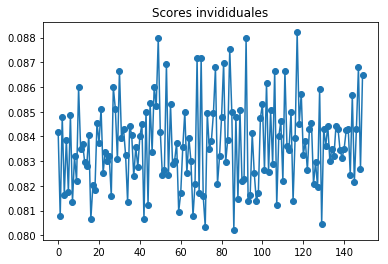

In [34]:
from sklearn.metrics import accuracy_score

preds = np.stack([t.predict(x_val) for t in m.estimators_])
accs = [accuracy_score(y_val==2, p) for p in preds]
plt.plot(accs, '-o')
plt.title('Scores invididuales');

In [35]:
# Usemos los árboles para obtener una predicción con una estimación de confianza.
sample = x_val.sample(1)

pred = np.stack([t.predict(sample) for t in m.estimators_])

pred.mean(), pred.mean() > 0.5, pred.std()

(3.3466666666666667, True, 0.84842337439642845)

### Parte 2.2. Visualización de la Predicción

El siguiente código es una adaptación del código mostrado en el siguiente tutorial: https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

In [36]:
#En primer lugar, se obtendrán los nombres de los parámetros que se tomarán en cuenta como variables de predicción
features = df_decks.columns[:4]

features

Index(['craft_cost', 'avg_mana', 'nminions', 'nspells'], dtype='object')

In [37]:
#El método siguiente calcula un coeficiente para cada tipo diferente. El modelo asume que si un tipo tiene un coeficiente
#más alto que los demás, entonces el dato corresponderá a dicho tipo.
m.predict_proba(x_train[features])[0:10]

array([[ 0.        ,  0.00869841,  0.35338793,  0.01129365,  0.62662001],
       [ 0.15534921,  0.09660317,  0.315     ,  0.39615873,  0.03688889],
       [ 0.00166667,  0.00666667,  0.91251587,  0.07724603,  0.00190476],
       [ 0.        ,  0.01007407,  0.13416138,  0.02607407,  0.82969048],
       [ 0.        ,  0.        ,  0.94730952,  0.05269048,  0.        ],
       [ 0.97381313,  0.00333333,  0.00222222,  0.02063131,  0.        ],
       [ 0.08045238,  0.09311376,  0.0660291 ,  0.72184921,  0.03855556],
       [ 0.        ,  0.00166667,  0.99235714,  0.00407143,  0.00190476],
       [ 0.        ,  0.00333333,  0.99666667,  0.        ,  0.        ],
       [ 0.37839153,  0.        ,  0.53734656,  0.0842619 ,  0.        ]])

In [38]:
#Guardado de predición en disco
import pickle

pkl_prediction = "pickle_predict.pkl"  #Este archivo se utilizará para el servicio web
with open(pkl_prediction, 'wb') as file:  
    pickle.dump(m, file)

### Parte 2.3: 'Prueba de Fuego' de la predicción

Por último, reemplazaremos las etiquetas desconocidas por etiquetas predecidas.

In [39]:
#Visualizaremos la información de este fragmento del dataframe original
willLabel.head(8)

,craft_cost,avg_mana,nminions,nspells,deck_archetype
0,0,3.066667,12,18,Unknown
1,5180,2.600000,12,18,Unknown
2,6260,3.900000,18,12,Unknown
6,960,2.000000,14,16,Unknown
7,8640,5.000000,25,4,Unknown
8,7920,3.733333,20,10,Unknown
9,7520,4.533333,18,10,Unknown
10,10240,5.066667,22,8,Unknown


In [40]:
#Obtendremos las predicciones
archetype_predicted = m.predict(willLabel[features])
archetype_predicted[0:10]

array([1, 1, 4, 2, 2, 2, 2, 2, 2, 4], dtype=int8)

In [41]:
#Utilizaremos predict_proba para ver el ajuste por tipos
m.predict_proba(willLabel[features])[0:10]

array([[ 0.        ,  0.42639153,  0.13634921,  0.13132804,  0.30593122],
       [ 0.00490741,  0.69145238,  0.06621429,  0.00944444,  0.22798148],
       [ 0.        ,  0.00333333,  0.2054127 ,  0.35528571,  0.43596825],
       [ 0.04317532,  0.22496825,  0.49199928,  0.10018254,  0.1396746 ],
       [ 0.        ,  0.04833333,  0.95166667,  0.        ,  0.        ],
       [ 0.        ,  0.00133333,  0.96869841,  0.00133333,  0.02863492],
       [ 0.        ,  0.        ,  0.74715079,  0.23178571,  0.02106349],
       [ 0.        ,  0.08331746,  0.90934921,  0.        ,  0.00733333],
       [ 0.        ,  0.        ,  0.93533333,  0.01266667,  0.052     ],
       [ 0.        ,  0.00266667,  0.39881217,  0.08408995,  0.51443122]])

In [42]:
#Reemplazo de etiqueta desconocida por etiqueta de diccionario
willLabel['deck_archetype'] = archetype_predicted
archetype_predicted = willLabel['deck_archetype']
willLabel['deck_archetype'] = willLabel['deck_archetype'].replace(cat_dict_arch['deck_archetype'])

In [43]:
willLabel.head(10)

,craft_cost,avg_mana,nminions,nspells,deck_archetype
0,0,3.066667,12,18,Combo
1,5180,2.600000,12,18,Combo
2,6260,3.900000,18,12,Tempo
6,960,2.000000,14,16,Control
7,8640,5.000000,25,4,Control
8,7920,3.733333,20,10,Control
9,7520,4.533333,18,10,Control
10,10240,5.066667,22,8,Control
11,6580,3.733333,18,12,Control
12,8020,4.566667,15,15,Tempo


In [44]:
#Por último, analizaremos la importancia de los parámetros
m.feature_importances_

array([ 0.38575934,  0.32260123,  0.12920036,  0.16243907])

In [46]:
imp = pd.DataFrame({'features':x_train.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
imp.style.bar()

,features,imp
0,craft_cost,0.385759
1,avg_mana,0.322601
3,nspells,0.162439
2,nminions,0.1292


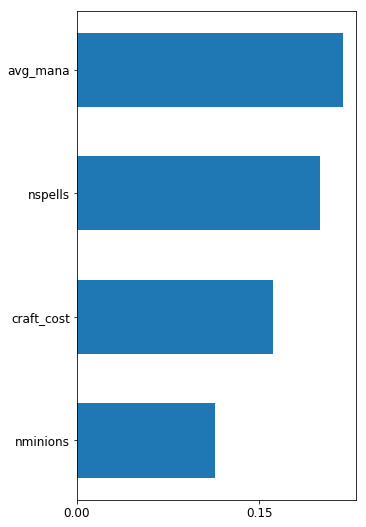

CPU times: user 1.42 s, sys: 56 ms, total: 1.48 s
Wall time: 658 ms


In [49]:
%%time
from rfpimp import importances, plot_importances

imp = importances(m, x_val, y_val)
plot_importances(imp, figsize=(5,9));

# Parte 3: Conclusiones

Luego de toda la experimentación del desarrollo del proyecto, los desarrolladores concluímos que:
- El promedio de coste de maná y el coste en polvo arcano de los mazos tienen la más alta relevancia. Esto se debe a que algunos arqueotipos establecen diferencias en el balance de la curva de maná y en la cantidad de cartas legendarias y épicas, respectivamente. El clásico ejemplo es el siguiente: por lo general los mazos Control tienen un alto coste de polvo arcano (por la cantidad de legendarias que posee) y un promedio de curva de maná elevada (algunas cartas del mazo Control tienden a tener un coste de maná mayor a 5).
- Los resultados son prometedores, puesto que se pudo hacer una clasificación variada en la data no etiquetada. En el futuro, se clasificará manualmente la data desconocida para realizar la verdadera visualización de la exactitud del sistema.

Además, a modo de retroalimentación y en un modo de sugerencia, se concluye que:
- Tomando en cuenta más parámetros, tales como la interacción de unas cartas con otras del mazo (sinergia), podremos generar un sistema de predicción más eficiente y preciso.
- Además, este experimento podría replicarse para otro tipo de datos, incluído algunos que no tengan relación con vídeojuegos.

Cualquier sugerencia o consulta puede hacerla con los siguientes modos de comunicación:
- Jorge Fatama Vera: jorge.fatama@pucp.edu.pe, jfatamav@e-quipu.pe
- Sergio Cama Chávez: scama@pucp.pe

Por favor, enviar el mensaje con el asunto empezando en "HS-DAP". Gracias de antemano.

<div align='right'><b>Pando, 24 de agosto de 2018</b></div>